# PCA on Train Set Plotting

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from Create_Mappings_and_Matrices import *

## Create Mappings and Matrices

In [2]:
# Create mappings and matrices
y_train, _, class_mapping, _, _, feature_matrices_rescaled_train, _, feature_matrix_labels = create_mappings_and_matrices()

# Reassign variables
y = y_train
feature_matrices_rescaled = feature_matrices_rescaled_train

all features train
           Class                             harmonized_filename  \
0          Sedan         Sedan_train_orig_test_00191_resized.jpg   
1    Convertible  Convertible_train_orig_train_07913_resized.jpg   
2         Pickup          SUV_train_orig_train_00163_resized.jpg   
3          Sedan        Sedan_train_orig_train_06113_resized.jpg   
4          Sedan         Sedan_train_orig_test_05711_resized.jpg   
..           ...                                             ...   
371        Sedan        Sedan_train_orig_train_05545_resized.jpg   
372       Pickup        Pickup_train_orig_test_01575_resized.jpg   
373          SUV          SUV_train_orig_train_06550_resized.jpg   
374          SUV          SUV_train_orig_train_03292_resized.jpg   
375        Sedan        Sedan_train_orig_train_01250_resized.jpg   

                                       image_path_blur  \
0    ../../../Images/train/Blurred/Sedan_train_orig...   
1    ../../../Images/train/Blurred/Convertible_t

HOG_24_ppc features shape: (6003, 2304)
HSV features shape: (6003, 768)
LBP features shape: (6003, 25)
VGG features shape: (6003, 512)
ViT features shape: (6003, 1280)


items in all_features_df columns not in feature groups (hog, vgg, etc.): []


all features shape: (6003, 11945)
sum of smaller features matrix widths:  11945


## Run PCA

In [ ]:
def get_PCA(X_list, n_components):
  '''
  Takes as input a list of feature matrices and returns a list of PCA objects and a list of transformed feature matrices.
  '''
  pca_list = []
  xpca_list = []
  for X in X_list:
    # PCA
    pca = PCA(n_components=n_components).fit(X) # not using whiten because it isn't rescaling but something else
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

In [3]:
# All principal components
pca_list, _ = get_PCA(feature_matrices_rescaled, n_components=None) # n_components=None returns all principal components

## Visualize Share of Variance Explained

In [4]:
# version of pca_list without the last all_features item
pca_list_without_all_features = pca_list[:-1]
# version of feature_matrix_labels without the last all_features item
feature_matrix_labels_without_all_features = feature_matrix_labels[:-1]

### Individual Features

In [5]:
def make_ind_pca_plot(x_limit=None):
    # Creating plot of cumulative share of variance explained
    plt.figure(figsize=(15,5))
    # color code each feature type
    colorst = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    labels = feature_matrix_labels_without_all_features
    for i in range(len(pca_list_without_all_features)):
        variance_explained_list = [0] + list(np.cumsum(pca_list_without_all_features[i].explained_variance_ratio_))
        plt.plot(variance_explained_list, colorst[i], label=labels[i])
    # y ticks - 0 to 1 in 0.05 increments
    plt.yticks(np.arange(0, 1.05, step=0.05))
    # x ticks up to limit
    plt.xlim(0, x_limit)
    #plt.xticks(range(0, x_limit+1, 10), labels = [item + 1 for item in range(0, x_limit+1, 10)])
    #labels = range(1, num_components_limit+1, 10)
    #plt.xticks(range(0, num_components_limit+1, 10), labels)
    # limit y axis to 1
    plt.ylim(0, 1)
    plt.grid(visible=True)
    plt.xlabel('Number of Components')
    plt.ylabel('Share of Variance Explained')
    plt.legend(loc='lower right')
    plt.margins(x =0.02)
    plt.savefig('../../Output/PCA and tSNE/PCA_variance_explained_feature_groups_up_to_{}.png'.format(x_limit))
    plt.show()

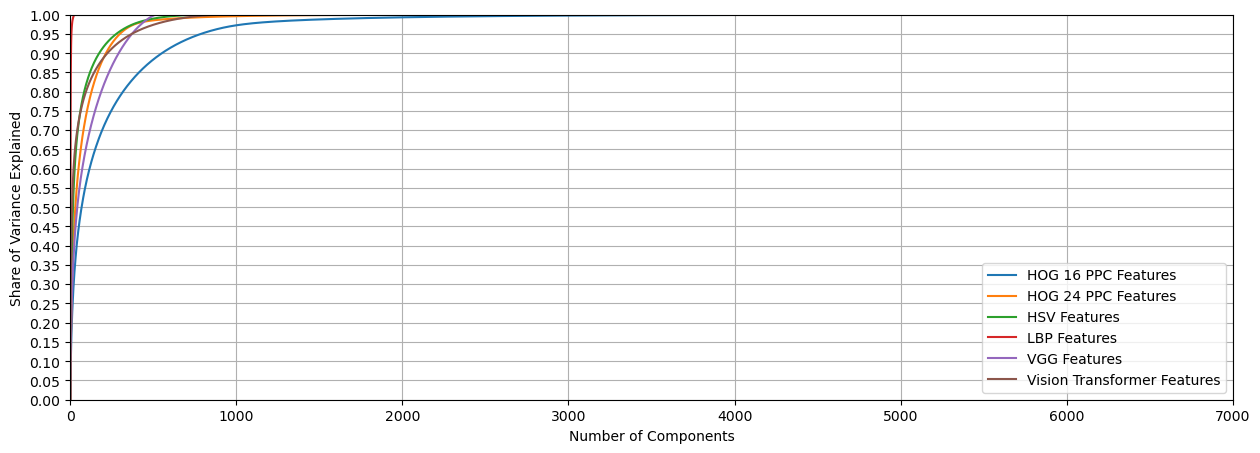

In [6]:
# Limit 7000 components
make_ind_pca_plot(7000)

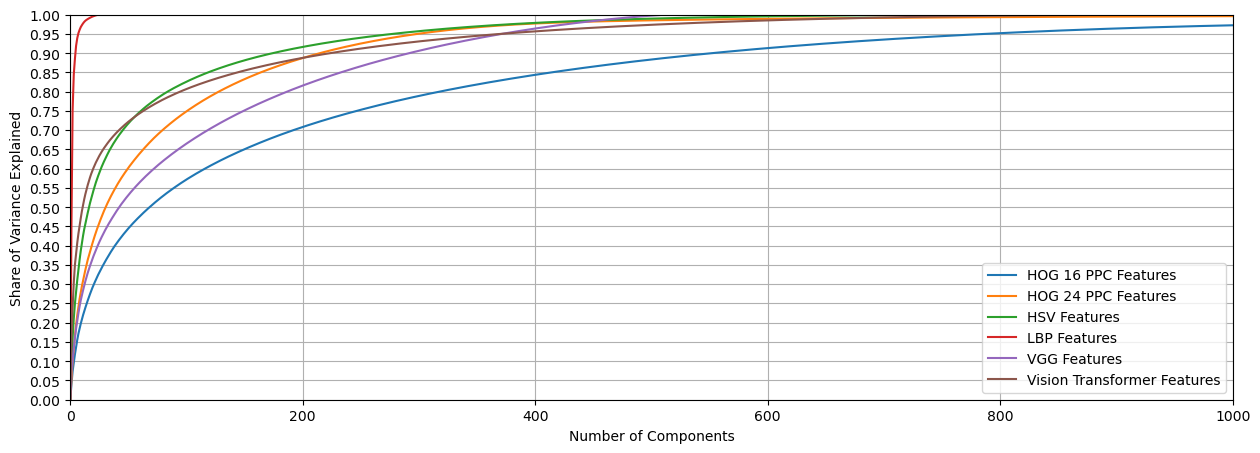

In [7]:
# 1000
make_ind_pca_plot(1000)

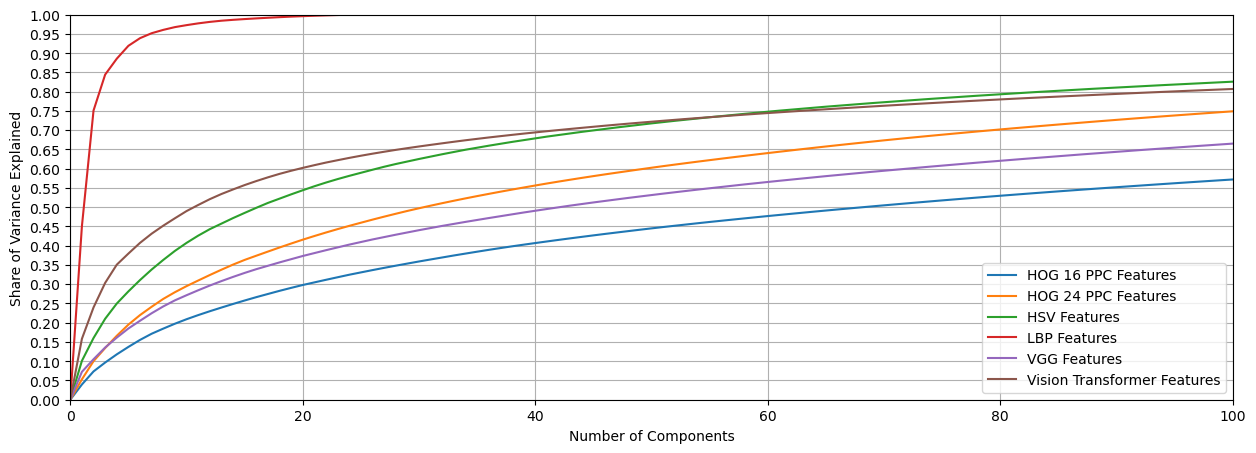

In [8]:
# 100
make_ind_pca_plot(100)

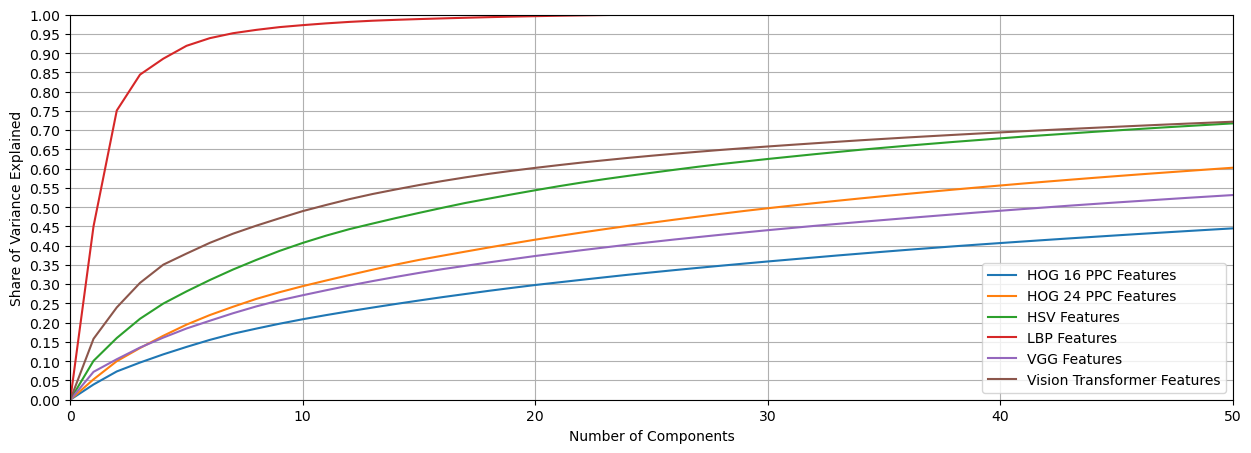

In [9]:
# 50
make_ind_pca_plot(50)

### All Features PCA Plot

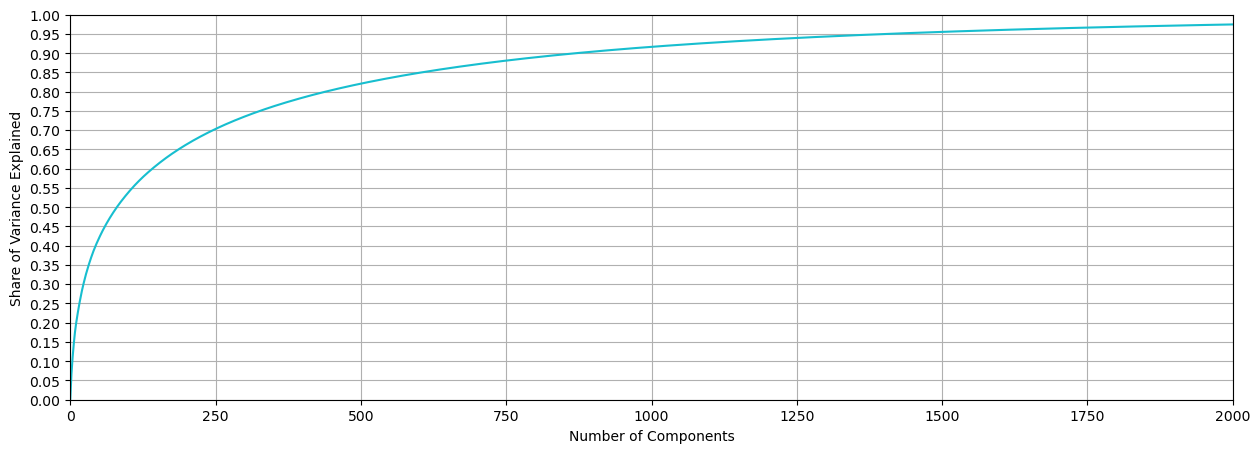

In [10]:
# Creating plot of cumulative share of variance explained
plt.figure(figsize=(15,5))
variance_explained_list = [0] + list(np.cumsum(pca_list[-1].explained_variance_ratio_))
plt.plot(variance_explained_list, '#17becf', label=feature_matrix_labels[-1])
# y ticks - 0 to 1 in 0.05 increments
plt.yticks(np.arange(0, 1.05, step=0.05))
# limit y axis to 1
plt.ylim(0, 1)
# Limit x axis
plt.xlim(0, 2000)
# Set xticks
#plt.xticks(range(0, 101, 10), labels = [item + 1 for item in range(0, 101, 10)])
plt.grid(visible=True)
plt.xlabel('Number of Components')
plt.ylabel('Share of Variance Explained')
#plt.legend(loc='lower right')
plt.margins(x =0.02)
plt.savefig('../../Output/PCA and tSNE/PCA_variance_explained_all_features.png')
plt.show()

## Full Plot

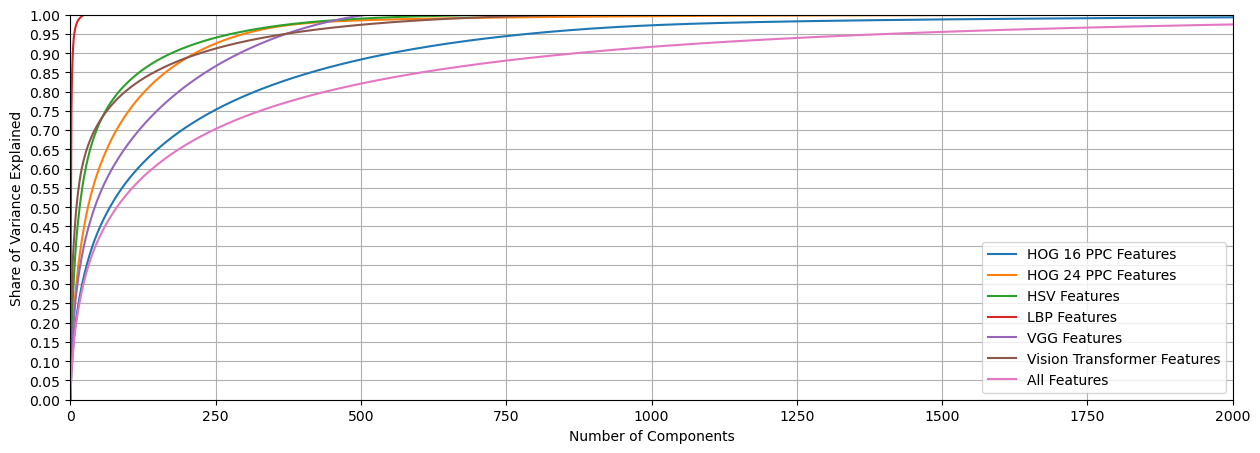

In [11]:
# Creating plot of cumulative share of variance explained
plt.figure(figsize=(15,5))
# color code each feature type
colorst = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
labels = feature_matrix_labels
for i in range(len(pca_list)):
    variance_explained_list = [0] + list(np.cumsum(pca_list[i].explained_variance_ratio_))
    plt.plot(variance_explained_list, colorst[i], label=labels[i])
# y ticks - 0 to 1 in 0.05 increments
plt.yticks(np.arange(0, 1.05, step=0.05))
# x ticks up to limit
plt.xlim(0, 2000)
#plt.xticks(range(0, x_limit+1, 10), labels = [item + 1 for item in range(0, x_limit+1, 10)])
#labels = range(1, num_components_limit+1, 10)
#plt.xticks(range(0, num_components_limit+1, 10), labels)
# limit y axis to 1
plt.ylim(0, 1)
plt.grid(visible=True)
plt.xlabel('Number of Components')
plt.ylabel('Share of Variance Explained')
plt.legend(loc='lower right')
plt.margins(x =0.02)
plt.savefig('../../Output/PCA and tSNE/PCA_variance_explained_up_to_2000.png')
plt.show()

## Discriminability of Features

In [12]:
# dimensionality reduction
pca_transformed_items = get_PCA(X_list=feature_matrices_rescaled, n_components=2)[-1] # second item to get transformed features

# Check shapes
print('pca transformed items length and first element shape')
print(len(pca_transformed_items))
print(pca_transformed_items[0].shape)

pca transformed items length and first element shape
7
(6003, 2)


In [13]:
def plot_classes(X, y, ax, title):
  '''
  Plot the classes in a 2D space.
  '''

  # color code each cluster (class)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(list(class_mapping.keys())))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==list(class_mapping.values())[k], 0], X[y==list(class_mapping.values())[k], 1], alpha=0.5, facecolors=colorst[k], label = list(class_mapping.keys())[k])

  ax.set_title(title)
  ax.legend()

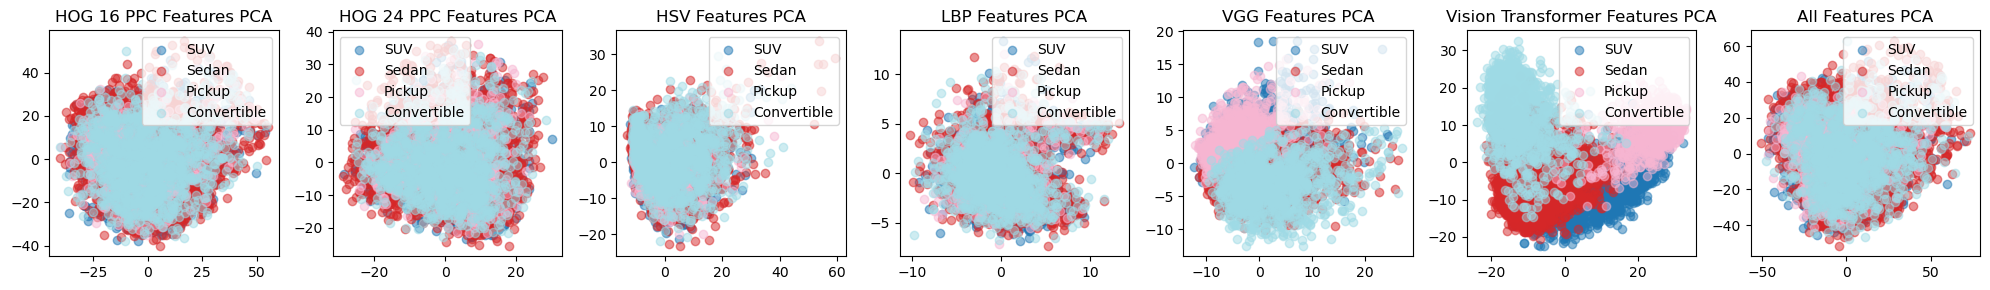

In [14]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=len(feature_matrices_rescaled), figsize=(20, 3))

# Iterate over feature matrices transformed and plot
for idx in range(len(feature_matrices_rescaled)):
  # y is the class labels
  plot_classes(pca_transformed_items[idx], y, ax[idx], title=feature_matrix_labels[idx] + ' PCA')

plt.tight_layout()
plt.savefig('../../Output/PCA and tSNE/PCA_Class_Discrinimability.png')
plt.show()